# Disney Interview - Naz Uremek


### <font color='blue'>Data Analysis for Visualization</font>
    - One-Way Anova and Tukey comparing Platforms to Total Subscriptions and Streams Watched (for slide 6)
        - Tukey by Platform and Total Streams Watched
        - Tukey by Platform and Total Subscriptions
        
### <font color='blue'>Recommender Model to Reduce Churn for ESPN+</font>

    - Correlation between First and Second Streamed Titles and Total Subscriptions (slide 10)
         - 7 Day Conversion Group
        - 10 Day Conversion Group
        
    - Correlation between First and Second Stream Sports and Total Subscriptions (slides 11 & 12)
         - 7 Day Conversion Group
        - 10 Day Conversion Group
    
### <font color='blue'>Appendix</font>

    - Finding Recommendater Model by First Stream Title and Days in between First and Second Streams (slide 10)
        - 7 Day Conversion Group
        - 10 Day Conversion Group
        
<font color='red'><b>NOTE:</b></font> for slides 7-9, see analysis [HERE](https://drive.google.com/file/d/1q4SXy99r1LPkTUMNbWayOco4jEjJRrfP/view?usp=sharing)

# Data Analysis for Visualization

In [1]:
import pandas as pd
import numpy as np
import time
import pandas as ps
import pandasql as ps
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

Start by opening lifetime dataset.

In [2]:
df_l = pd.read_csv('C:\\Users\\IBM_ADMIN\\Documents\\Test\\Disney_lifetime.csv', delimiter=',', encoding='utf8')
df_l.head(10)

,subscription_source_ref,swid,sub_random,swid_random,platform,cohort,sku,product_name,signup_date,expiration_date,...,monthy_active_user_flag,monthly_minutes_watched,monthly_streams_watched,weekly_active_user_flag,weekly_minutes_watched,weekly_streams_watched,daily_active_user_flag,daily_minutes_watched,daily_streams_watched,updated_as_of
0,GPA.3399-2979-7501-78822,{DF15AAE1-2CB8-40AA-95AA-E12CB8B0AAC5},154,83.0,GOOGLE,ESPN+,com.espn.monthly.espnplus7dft.google,Google ESPN Plus Base Monthly with 7 Day Free ...,10/1/2018,11/1/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
1,8dbU-lRTp1n1pyZ4N80o6KECfofVM9poSPpZufKObAg=:3:11,{028C1922-3F6B-4882-B6E2-FF07A85B41C7},215,103.0,AMAZON,ESPN+,com.espn.monthly.espnplus7dft.tv.amazon,FireTV ESPN Plus Monthly Base with 7 Day Free ...,10/1/2018,1/8/2019,...,1,67.132231,5,1,61.194965,4,0,0.0,0,1/7/2019
2,GPA.3399-1492-8169-67142,{BE9EDC52-A413-4478-9F6B-B2F02ADA15E0},113,69.0,GOOGLE,ESPN+,com.espn.monthly.espnplus7dft.google,Google ESPN Plus Base Monthly with 7 Day Free ...,10/1/2018,10/8/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
3,W2YyEJR15dXBTyqSlRjV6gdD7KEPrS4cnHAjswLSnUk=:3:11,{E350D4F4-E2DE-459A-B0C0-B6618A554AC3},255,230.0,AMAZON,ESPN+,com.espn.monthly.espnplus7dft.tv.amazon,FireTV ESPN Plus Monthly Base with 7 Day Free ...,10/1/2018,1/8/2019,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
4,1.90001E+14,{CC6E6415-7670-46D5-AE64-157670B6D517},97,198.0,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,1/8/2019,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
5,GPA.3366-6437-8501-27819,{02D6F77A-1A0A-40C0-A030-70D4D9456347},168,107.0,GOOGLE,ESPN+,com.espn.monthly.espnplus7dft.google,Google ESPN Plus Base Monthly with 7 Day Free ...,10/1/2018,11/1/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
6,4.6E+14,NaN,254,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,11/12/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
7,cQRAHM5HLIppR8wCucoB2eCockNiEYEw4f_nx6Tsemw=:3:11,NaN,166,NaN,AMAZON,ESPN+,com.espn.monthly.espnplus7dft.tv.amazon,FireTV ESPN Plus Monthly Base with 7 Day Free ...,10/1/2018,10/14/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
8,0ES4O-8YjmjMjNRfMOOq4P9b0IHZ_O4cipA4DkZLf0s=:3:11,NaN,235,NaN,AMAZON,ESPN+,com.espn.monthly.espnplus7dft.tv.amazon,FireTV ESPN Plus Monthly Base with 7 Day Free ...,10/1/2018,10/8/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019
9,5.7E+14,NaN,221,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,10/8/2018,...,0,0.000000,0,0,0.000000,0,0,0.0,0,1/7/2019


Open media metadata file in order to merge with the lifetime data.

In [3]:
df_m = pd.read_csv('C:\\Users\\IBM_ADMIN\\Documents\\Test\\media_meta_data.csv', delimiter=',', encoding='utf8')
df_m.head(10)

,mediaid,contentid,partnerairingid,type,programtype,runtime,channel_id,mediaconfig_state,mediaconfig_producttype,livebroadcast,...,sport,titleepisodename,hometeamid,awayteamid,hometeamname,awayteamname,gamedescription,gamedate_est,teams,contentsource
0,14843b3c-eb30-46bb-99e1-7b5e03c2cb5f,a4dc0728-d2fa-4caa-911c-a363b34d3886,ESPN:a110950914,Airing,sports,2:00:00,ea98cb68-1b74-11e8-9c0c-12079456feac,OFF,LIVE,True,...,Soccer,Saint Louis vs. UMass (W Soccer),NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
1,2018305a-1d97-4b9e-be31-760eae45e9bb,05789b06-e36d-4353-9d45-fefb7ac04d80,ESPN:a111029615,Airing,sports,2:10:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Soccer,Cagliari vs. Bologna (Serie A),NaN,NaN,Bologna,Cagliari,2018-10-06 Cagliari vs. Bologna,50:00.0,NaN,espn
2,2100c9c9-dd24-4327-a4de-187ffee4d40d,cdec37a3-080f-4c19-b8a0-aa2f521d9e13,ESPN:a110992589,Airing,sports,6:30:00,ea98cb68-1b74-11e8-9c0c-12079456feac,OFF,LIVE,True,...,Tennis,ITA Northeast Regionals (Court 4),NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
3,26747903-530c-4383-9760-a71b579501ae,3e7755b6-c1fa-4535-b13b-02df42285c13,ESPN:a110950343,Airing,sports,2:00:00,ea98cb68-1b74-11e8-9c0c-12079456feac,OFF,LIVE,True,...,Soccer,Saint Joseph's vs. George Mason (M Soccer),NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
4,29c221cf-8c16-42c0-ae67-4161b71bf1ee,88173b00-bb10-4d06-83cc-830ad148f26b,ESPN:a111019728,Airing,sports,0:25:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Boxing,"Tue, 10/30 - The Boxing Beat: Special guests L...",NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
5,33c36a47-c010-4a08-9601-69850165f2ef,8e7cce8c-73f5-404d-b264-2f4147b4af96,ESPN:a110958243,Airing,sports,2:00:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Volleyball,Quinnipiac vs. Iona (W Volleyball),NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
6,34b7d91f-3114-4530-b145-4415365bb0d6,cb30d74a-567a-4e77-bcd5-64b20734b494,ESPN:a110823370,Airing,sports,2:00:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Soccer,North Carolina FC vs. New York Red Bulls II (U...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
7,36c6aa31-e28f-4e4a-a70e-b52b2e6478e0,06a5dc8b-d07b-4705-b434-fe20a1af3520,ESPN:a110950910,Airing,sports,2:00:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Soccer,Saint Joseph's vs. Rhode Island (W Soccer),NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
8,0006c8ec-9cd6-4e03-8518-1faa64735e48,ba598012-5bcd-4271-bbe5-96e2009aea42,ESPN:a110992565,Airing,sports,6:30:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Tennis,ITA Northeast Regionals (Court 2) (NCAA Tennis),NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
9,011e46cd-652e-4840-9e2a-fe56d486c683,171daf37-541a-492f-a2ac-ba060d020ff8,ESPN:a110902117,Airing,sports,2:05:00,ea98cb68-1b74-11e8-9c0c-12079456feac,ON,VOD,True,...,Soccer,Feyenoord vs. PEC Zwolle (Eredivisie),NaN,NaN,PEC Zwolle,Feyenoord,2018-10-21 Feyenoord vs. PEC Zwolle,25:00.0,NaN,espn


Inner join the lifetime dataset to media metadata to get subscription information on the type of media streamed, mainly focusing on media title and sport.

In [4]:
lm = pd.merge(df_l, df_m, left_on='first_stream_media_id', right_on='mediaid', how='inner')
lm.head(10)

,subscription_source_ref,swid,sub_random,swid_random,platform,cohort,sku,product_name,signup_date,expiration_date,...,sport,titleepisodename,hometeamid,awayteamid,hometeamname,awayteamname,gamedescription,gamedate_est,teams,contentsource
0,GPA.3399-2979-7501-78822,{DF15AAE1-2CB8-40AA-95AA-E12CB8B0AAC5},154,83.0,GOOGLE,ESPN+,com.espn.monthly.espnplus7dft.google,Google ESPN Plus Base Monthly with 7 Day Free ...,10/1/2018,11/1/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
1,1.4E+14,NaN,134,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,10/8/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
2,4.8E+14,NaN,26,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,10/8/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
3,2.7E+14,NaN,76,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,10/8/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
4,espn_506e6c53-b4b2-4a47-86db-4e906615a13d_1538...,{9D5EB430-9AA6-41F2-8E87-EB463CE11510},251,206.0,BAMTECH,ESPN+,8.4002E+24,ESPN Plus Monthly Base,10/1/2018,10/9/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
5,espn_03a6c6b8-372c-4450-a4ce-1fac9739b51c_1538...,{41AE20E7-0E7E-4CD8-AE20-E70E7EFCD857},89,20.0,BAMTECH,ESPN+,8.4002E+24,ESPN Plus Monthly Base,10/1/2018,10/10/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
6,4.3E+14,NaN,217,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,12/8/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
7,5.1E+14,NaN,94,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,10/8/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
8,7.1E+14,NaN,191,NaN,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,11/8/2018,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl
9,5.4E+14,{685BD37D-AA60-4C1E-8DEF-D1DBA77F33E9},161,38.0,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/1/2018,1/8/2019,...,Hockey,2018-10-04 : WSH at PIT | LIVE STREAM,5.0,15.0,Pittsburgh Penguins,Washington Capitals,2018-10-04 Washington Capitals vs. Pittsburgh ...,00:00.0,NaN,nhl


In [18]:
lm.to_csv('C:\\Users\\IBM_ADMIN\\Documents\\Test\\Disney_life_media.csv', header=True, index=False, index_label=None)

## One-Way Anova and Tukey comparing Platforms to Total Subscriptions and Streams Watched (for slide 6)

In [108]:
df_p = """

    SELECT
        swid,
        platform,
        SUM(total_streams_watched) AS tot_str,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm
        
        GROUP BY swid, platform
        
        ORDER BY sub_ct DESC; """

dfp = (ps.sqldf(df_p, locals()))
dfp.head(5)

,swid,platform,tot_str,sub_ct
0,None,APPLE,188141,28905
1,None,GOOGLE,20669,5174
2,None,AMAZON,17834,4501
3,None,ROKU,18738,3003
4,{5E7B9DCF-D591-44E9-9C75-65BF8E03F2B9},BAMTECH,35,3


### Tukey by Platform and Total Streams Watched

group1,group2,meandiff,lower,upper,reject
AMAZON,APPLE,3.6135,-18.3872,25.6141,False
AMAZON,BAMTECH,-2.9508,-24.3307,18.4291,False
AMAZON,GOOGLE,-2.2778,-26.8597,22.3042,False
AMAZON,ROKU,2.1055,-28.3524,32.5635,False
APPLE,BAMTECH,-6.5643,-16.6586,3.53,False
APPLE,GOOGLE,-5.8912,-21.6731,9.8906,False
APPLE,ROKU,-1.5079,-25.4345,22.4187,False
BAMTECH,GOOGLE,0.6731,-14.2313,15.5774,False
BAMTECH,ROKU,5.0564,-18.3007,28.4135,False
GOOGLE,ROKU,4.3833,-21.9364,30.703,False


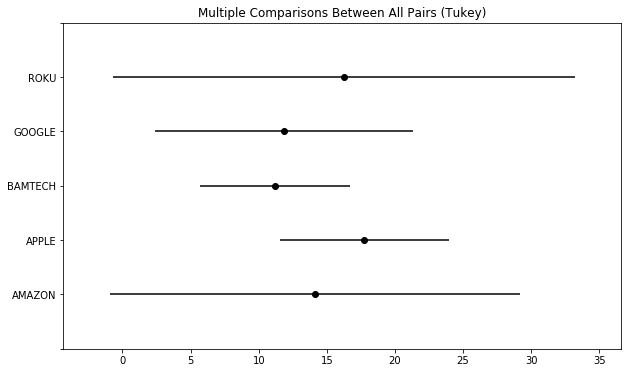

In [109]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_str = pairwise_tukeyhsd(dfp['tot_str'],     # Data
                          groups=dfp['platform'],   # Groups
                          alpha=0.05)          # Significance level

tukey_str.plot_simultaneous()    # Plot group confidence intervals

tukey_str.summary()              # See test summary

### Tukey by Platform and Total Subscriptions

group1,group2,meandiff,lower,upper,reject
AMAZON,APPLE,-0.013,-3.4494,3.4233,False
AMAZON,BAMTECH,-0.828,-4.1673,2.5114,False
AMAZON,GOOGLE,-0.4083,-4.2478,3.4312,False
AMAZON,ROKU,-0.163,-4.9202,4.5943,False
APPLE,BAMTECH,-0.8149,-2.3916,0.7617,False
APPLE,GOOGLE,-0.3952,-2.8602,2.0698,False
APPLE,ROKU,-0.1499,-3.887,3.5872,False
BAMTECH,GOOGLE,0.4197,-1.9082,2.7476,False
BAMTECH,ROKU,0.665,-2.9832,4.3132,False
GOOGLE,ROKU,0.2453,-3.8656,4.3562,False


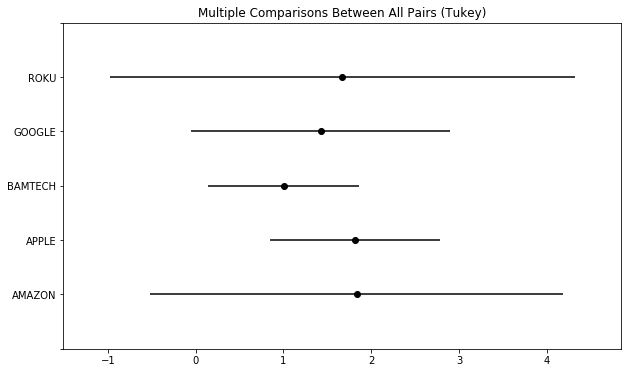

In [110]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_sub = pairwise_tukeyhsd(dfp['sub_ct'],     # Data
                          groups=dfp['platform'],   # Groups
                          alpha=0.05)          # Significance level

tukey_sub.plot_simultaneous()    # Plot group confidence intervals

tukey_sub.summary()              # See test summary

## Correlation between First and Second Streamed Titles and Total Subscriptions (slide 10)

In [16]:
lm2 = pd.merge(lm, df_m, left_on='second_stream_media_id', right_on='mediaid', how='inner')
lm2.head(10)

,subscription_source_ref,swid,sub_random,swid_random,platform,cohort,sku,product_name,signup_date,expiration_date,...,sport_y,titleepisodename_y,hometeamid_y,awayteamid_y,hometeamname_y,awayteamname_y,gamedescription_y,gamedate_est_y,teams_y,contentsource_y
0,GPA.3399-2979-7501-78822,{DF15AAE1-2CB8-40AA-95AA-E12CB8B0AAC5},154,83.0,GOOGLE,ESPN+,com.espn.monthly.espnplus7dft.google,Google ESPN Plus Base Monthly with 7 Day Free ...,10/1/2018,11/1/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
1,ta2EDb0A2aHS5pAC8y84SgfAvgOGT934i3NbjgSqpPA=:3:11,{C91B0BA1-FD89-40EC-9E99-06312E47A73B},113,105.0,AMAZON,ESPN+,com.espn.monthly.espnplus7dft.tv.amazon,FireTV ESPN Plus Monthly Base with 7 Day Free ...,10/29/2018,11/5/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
2,espn_1c1002a5-2a58-4843-b2d2-d9be6c6fa15f_1540...,{7E7B26D0-35CA-4D8C-A980-47D433FA6ED2},240,180.0,BAMTECH,ESPN+,8.4002E+24,ESPN Plus Monthly Base,10/29/2018,11/7/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
3,1.60001E+14,{9A45E304-4B81-46EF-A433-DDA94C1DEBE2},164,167.0,APPLE,ESPN+,com.espn.monthly.espnplus7dft.apple,Apple ESPN Plus Base Monthly with 7 Day Free T...,10/29/2018,11/5/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
4,wKFF8kJmiNV9aoGt7UdpuA-B3-RgI3jM0QjLe1uTyv4=:3:11,NaN,159,NaN,AMAZON,ESPN+,com.espn.monthly.espnplus7dft.tablet.amazon,Amazon ESPN Plus Monthly Base with 7 Day Free ...,10/29/2018,11/8/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
5,espn_7720b650-3a9e-4287-a8e3-a8d85f217464_1540...,{E79822FB-9251-44F9-B561-75EE711F7D84},87,159.0,BAMTECH,ESPN+,8.4002E+24,ESPN Plus Monthly Base,10/29/2018,2/7/2019,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
6,espn_4898009d-4231-4ee6-aa08-ce1e5b280928_1540...,{CA18E9FB-FB89-4F8A-9901-688EC8B3343B},222,101.0,BAMTECH,ESPN+,8.4002E+24,ESPN Plus Monthly Base,10/29/2018,11/7/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
7,4.6E+14,NaN,255,NaN,APPLE,ESPN+,com.espn.monthly.espnplusbase.apple,Apple ESPN Plus Base Monthly,10/29/2018,1/29/2019,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
8,espn_c3978626-2473-4f8b-8114-8e625ad7a152_1540...,{72E0B184-43DF-46C4-BFC6-D4D8751CA800},249,45.0,BAMTECH,ESPN+,8.4002E+24,ESPN Plus Monthly Base,10/29/2018,11/7/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn
9,57a922ab-7660-4040-ad28-a98900015f82,{2E3A5996-701A-45BD-BA59-96701AB5BD35},180,215.0,ROKU,ESPN+,com.espn.monthly.espnplus7dft.roku,Roku ESPN Plus Base with 7 day free trial,10/29/2018,11/5/2018,...,Soccer,Oakland vs. Northern Kentucky (Quarterfinal) (...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,espn


### Day 7 Conversion Group

In [18]:
df_t7 = """

    SELECT
        title_x as f_title,
        title_y as s_title,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm2
        WHERE conv_diff = 7
        AND days_group is not null
        AND s_title is not null
        
        GROUP BY f_title, s_title  
        
        ORDER BY sub_ct DESC; """

df_titles_7 = (ps.sqldf(df_t7, locals()))
df_titles_7.head(5)

,f_title,s_title,sub_ct
0,Peyton Manning: Breaking Down Josh Rosen,Detail - Peyton Manning: Breaking Down Matthew...,136
1,Spain vs. England (UEFA Nations League),France vs. Germany (UEFA Nations League),135
2,Philadelphia Flyers vs. Boston Bruins,Emporia State vs. #1 Kansas (M Basketball),89
3,North Dakota State vs. Northern Iowa (Football),North Dakota State vs. Western Illinois (Footb...,88
4,Washington Capitals vs. Pittsburgh Penguins,Vegas Golden Knights vs. Pittsburgh Penguins,78


In [19]:
titles_7 = df_titles_7.pivot(index='s_title', columns='f_title', values='sub_ct')
titles_7.head()

f_title,#1 Clarkson vs. St. Lawrence (W Hockey),#13 Wisconsin vs. Clarkson (M Hockey),#13 Wisconsin vs. St. Lawrence (M Hockey),#14 Michigan vs. Oakland (M Soccer),#18 Virginia Tech vs. Davidson (M Soccer),#21 Fordham vs. Saint Joseph's (M Soccer),#23 Baylor vs. Kansas (W Volleyball),#24 Cornell vs. Harvard (M Soccer),#24 Princeton vs. Cornell (W Soccer),#25 Cornell vs. Brown (M Soccer),...,Yale vs. Cornell (W Volleyball),Yale vs. Dartmouth (Field Hockey),Yale vs. Dartmouth (M Soccer),Yale vs. Dartmouth (W Soccer),Yale vs. Princeton (W Hockey),Yale vs. Quinnipiac (W Hockey),Youngstown State vs. Detroit Mercy (W Soccer),Youngstown State vs. Milwaukee (W Volleyball),Youngstown State vs. South Dakota State (Football),Zebre Rugby Club vs. Edinburgh (Guinness PRO14 Rugby)
s_title,,,,,,,,,,,,,,,,,,,,,
#1 Clarkson vs. St. Lawrence (W Hockey),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#13 Wisconsin vs. Clarkson (M Hockey),6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#13 Wisconsin vs. St. Lawrence (M Hockey),NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#14 Michigan vs. Oakland (M Soccer),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#18 Virginia Tech vs. Davidson (M Soccer),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
ex3 = titles_7['Peyton Manning: Breaking Down Josh Rosen']

like_ex3 = titles_7.corrwith(ex3)

corr_ex3 = pd.DataFrame(like_ex3, columns=['Correlation'])
corr_ex3.dropna(inplace=True)
corr_ex3.head()

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,Correlation
f_title,
#13 Wisconsin vs. Clarkson (M Hockey),0.000000
10/20 Cooldown,-0.189593
AS Roma vs. SPAL (Serie A),-0.128518
Anaheim Ducks vs. St. Louis Blues,0.934513
Anthony Yarde vs. Walter Gabriel Sequeira,-0.336011


In [107]:
corr_7_titles = pd.merge(corr_ex3, df_titles_7, left_on='f_title', right_on='f_title', how='inner')
corr_7_titles[corr_7_titles['sub_ct']>20].sort_values('Correlation', ascending=False).head(20)

,f_title,Correlation,s_title,sub_ct
1997,Peyton Manning: Breaking Down Josh Rosen,1.000000,Detail - Peyton Manning: Breaking Down Matthew...,136
2901,Vegas Golden Knights vs. Pittsburgh Penguins,0.932324,Winnipeg Jets vs. Nashville Predators,32
2900,Vegas Golden Knights vs. Pittsburgh Penguins,0.932324,Pittsburgh Penguins vs. Toronto Maple Leafs,33
1106,Florida Panthers vs. Washington Capitals,0.805119,Countdown to Craziness,46
3072,"Wed, 10/24 - In the Crease",0.767222,Emporia State vs. #1 Kansas (M Basketball),40
980,Emporia State vs. #1 Kansas (M Basketball),0.042144,Washington Capitals vs. Edmonton Oilers,34
981,Emporia State vs. #1 Kansas (M Basketball),0.042144,Philadelphia Flyers vs. Boston Bruins,33
1147,France vs. Germany (UEFA Nations League),-0.028387,Belgium vs. Netherlands (UEFA International Ma...,63
2533,Top Rank Boxing on ESPN: Undercards,-0.065870,BC Lions vs. Calgary Stampeders (Canadian Foot...,72
1329,Juventus vs. Genoa (Serie A),-0.100273,Buffalo vs. Toledo (Football),27


### Day 10 Conversion Group

In [22]:
df_t10 = """

    SELECT
        title_x as f_title,
        title_y as s_title,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm2
        WHERE conv_diff = 10
        AND days_group is not null
        AND s_title is not null
        
        GROUP BY f_title, s_title  
        
        ORDER BY sub_ct DESC; """

df_titles_10 = (ps.sqldf(df_t10, locals()))
df_titles_10.head(5)

,f_title,s_title,sub_ct
0,Peyton Manning: Breaking Down Josh Rosen,Detail - Peyton Manning: Breaking Down Matthew...,165
1,Juventus vs. Genoa (Serie A),Empoli vs. Juventus (Serie A),153
2,Spain vs. England (UEFA Nations League),France vs. Germany (UEFA Nations League),134
3,Washington Capitals vs. Pittsburgh Penguins,Vegas Golden Knights vs. Pittsburgh Penguins,129
4,Top Rank Boxing on ESPN: Undercards,BC Lions vs. Calgary Stampeders (Canadian Foot...,125


In [23]:
titles_10 = df_titles_10.pivot(index='s_title', columns='f_title', values='sub_ct')
titles_10.head()

f_title,#1 Clarkson vs. St. Lawrence (W Hockey),#13 Wisconsin vs. Clarkson (M Hockey),#13 Wisconsin vs. St. Lawrence (M Hockey),#14 Michigan vs. Oakland (M Soccer),#18 Virginia Tech vs. Davidson (M Soccer),#21 Fordham vs. Saint Joseph's (M Soccer),#23 Baylor vs. Kansas (W Volleyball),#23 Rhode Island vs. Duquesne (M Soccer),#24 Cornell vs. Harvard (M Soccer),#24 Princeton vs. Cornell (W Soccer),...,Yale vs. Dartmouth (M Soccer),Yale vs. Dartmouth (W Soccer),Yale vs. Princeton (W Hockey),Yale vs. Quinnipiac (W Hockey),Youngstown State vs. Detroit Mercy (W Soccer),Youngstown State vs. Green Bay (W Soccer),Youngstown State vs. Green Bay (W Volleyball),Youngstown State vs. Milwaukee (W Volleyball),Youngstown State vs. South Dakota State (Football),Zebre Rugby Club vs. Edinburgh (Guinness PRO14 Rugby)
s_title,,,,,,,,,,,,,,,,,,,,,
#1 Clarkson vs. St. Lawrence (W Hockey),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#13 Wisconsin vs. Clarkson (M Hockey),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#13 Wisconsin vs. St. Lawrence (M Hockey),2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#14 Michigan vs. Oakland (M Soccer),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#18 Virginia Tech vs. Davidson (M Soccer),NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ex4 = titles_10['Peyton Manning: Breaking Down Josh Rosen']

like_ex4 = titles_10.corrwith(ex4)

corr_ex4 = pd.DataFrame(like_ex4, columns=['Correlation'])
corr_ex4.dropna(inplace=True)
corr_ex4.head()

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,Correlation
f_title,
#13 Wisconsin vs. Clarkson (M Hockey),0.535480
#13 Wisconsin vs. St. Lawrence (M Hockey),1.000000
#18 Virginia Tech vs. Davidson (M Soccer),-0.330556
#4 Ohio State vs. #10 St. Lawrence (W Hockey),-0.500000
10/17 Worlds Cooldown,-0.146128


In [68]:
corr_10_titles = pd.merge(corr_ex4, df_titles_10, left_on='f_title', right_on='f_title', how='inner')
corr_10_titles[corr_10_titles['sub_ct']>20].sort_values('Correlation', ascending=False).head(20)

,f_title,Correlation,s_title,sub_ct
4728,Peyton Manning: Breaking Down Josh Rosen,1.000000,Pittsburgh Penguins vs. Toronto Maple Leafs,27
2927,Jacksonville State vs. Eastern Kentucky (Footb...,1.000000,Jacksonville State vs. Southeast Missouri Stat...,24
4727,Peyton Manning: Breaking Down Josh Rosen,1.000000,Detail - Peyton Manning: Breaking Down Matthew...,165
5027,Poland vs. Portugal (UEFA Nations League),0.943880,Wales vs. Spain (UEFA International Match),22
5026,Poland vs. Portugal (UEFA Nations League),0.943880,France vs. Iceland (UEFA International Match),33
6832,Vegas Golden Knights vs. Pittsburgh Penguins,0.905395,Winnipeg Jets vs. Nashville Predators,55
6831,Vegas Golden Knights vs. Pittsburgh Penguins,0.905395,Pittsburgh Penguins vs. Toronto Maple Leafs,56
901,Calgary Flames vs. Nashville Predators,0.845000,Winnipeg Jets vs. Nashville Predators,21
411,Arizona Coyotes vs. Anaheim Ducks,0.780456,Vegas Golden Knights vs. Pittsburgh Penguins,21
3703,"Mon, 10/8 - The Fantasy Show: Yates worried ab...",0.654654,"Tue, 10/9 - The Fantasy Show: Who can replace ...",34


## Correlation between First and Second Stream Sports and Total Subscriptions (slides 11 & 12)

### Day 7 Conversion Group

In [26]:
df_s7 = """

    SELECT
        sport_x as f_sport,
        sport_y as s_sport,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm2
        WHERE conv_diff = 7
        AND f_sport is not null
        AND s_sport is not null
        
        GROUP BY f_sport, s_sport 
        
        ORDER BY sub_ct DESC; """

df_sports_7 = (ps.sqldf(df_s7, locals()))
df_sports_7.head(5)

,f_sport,s_sport,sub_ct
0,Soccer,Soccer,4928
1,Football,Football,3232
2,Soccer,Football,1083
3,Football,Soccer,829
4,Hockey,Hockey,768


In [27]:
sports_7 = df_sports_7.pivot(index='s_sport', columns='f_sport', values='sub_ct')
sports_7.head()

f_sport,Auto Racing,Basketball,Boxing,Field Hockey,Football,Hockey,Ice Hockey,Lacrosse,Mixed Martial Arts,Rugby,Soccer,Tennis,Track and Field,Volleyball,Water Polo
s_sport,,,,,,,,,,,,,,,
Auto Racing,1.0,1.0,NaN,1.0,5.0,NaN,2.0,NaN,NaN,1.0,4.0,NaN,NaN,1.0,NaN
Basketball,NaN,105.0,5.0,10.0,70.0,174.0,63.0,1.0,1.0,4.0,120.0,6.0,1.0,44.0,NaN
Boxing,NaN,3.0,221.0,2.0,147.0,62.0,7.0,NaN,7.0,1.0,144.0,6.0,NaN,6.0,1.0
Field Hockey,NaN,21.0,3.0,57.0,28.0,7.0,11.0,NaN,1.0,2.0,84.0,3.0,6.0,8.0,1.0
Football,4.0,51.0,169.0,35.0,3232.0,379.0,106.0,1.0,35.0,22.0,1083.0,28.0,3.0,83.0,9.0


In [28]:
ex5 = sports_7['Soccer']

like_ex5 = sports_7.corrwith(ex5)

corr_ex5 = pd.DataFrame(like_ex5, columns=['Correlation'])
corr_ex5.dropna(inplace=True)
corr_ex5.head()

,Correlation
f_sport,
Auto Racing,-0.074152
Basketball,0.597398
Boxing,0.419377
Field Hockey,0.695660
Football,0.359065


In [29]:
corr_7_sport = pd.merge(corr_ex5, df_sports_7, left_on='f_sport', right_on='f_sport', how='inner')
corr_7_sport[corr_7_sport['sub_ct']>100].sort_values('Correlation', ascending=False).head(20)

,f_sport,Correlation,s_sport,sub_ct
117,Soccer,1.000000,Rugby,101
116,Soccer,1.000000,Basketball,120
115,Soccer,1.000000,Boxing,144
114,Soccer,1.000000,Volleyball,166
113,Soccer,1.000000,Ice Hockey,189
112,Soccer,1.000000,Hockey,438
111,Soccer,1.000000,Football,1083
110,Soccer,1.000000,Soccer,4928
6,Basketball,0.597398,Hockey,141
8,Basketball,0.597398,Basketball,105


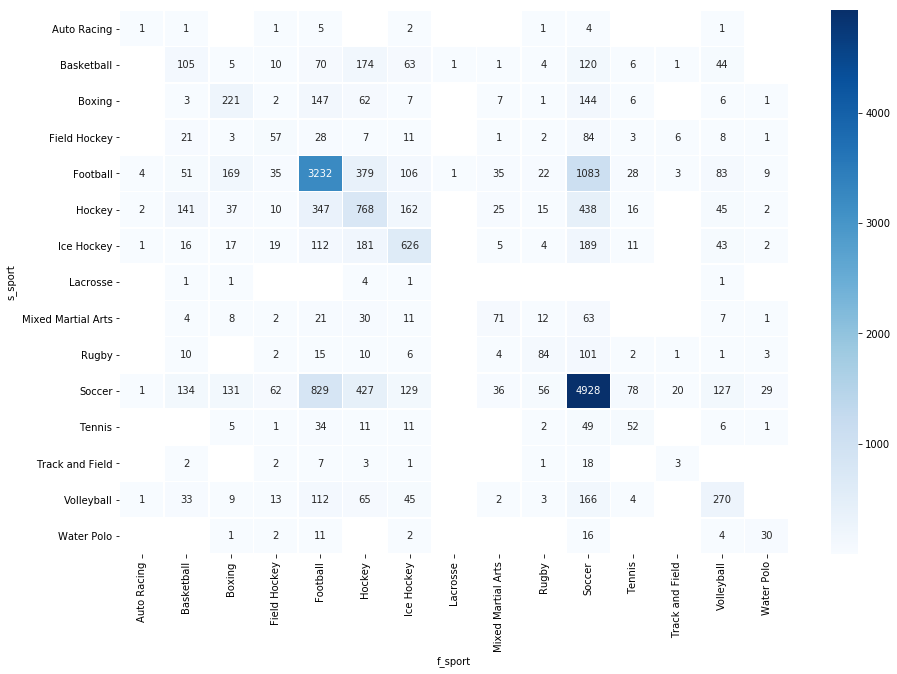

In [30]:
fig, ax = plt.subplots(figsize=(15,10)) 
ax = sns.heatmap(sports_7, annot=True, linewidths=.5, cmap='Blues', fmt='g')

### Day 10 Conversion Group

In [31]:
df_s10 = """

    SELECT
        sport_x as f_sport,
        sport_y as s_sport,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm2
        WHERE conv_diff = 10
        AND f_sport is not null
        AND s_sport is not null
        
        GROUP BY f_sport, s_sport 
        
        ORDER BY sub_ct DESC; """

df_sports_10 = (ps.sqldf(df_s10, locals()))
df_sports_10.head(5)

,f_sport,s_sport,sub_ct
0,Soccer,Soccer,6636
1,Football,Football,5095
2,Hockey,Hockey,1852
3,Soccer,Football,1212
4,Football,Soccer,1161


In [142]:
sports_10 = df_sports_10.pivot(index='s_sport', columns='f_sport', values='sub_ct')
sports_10.head()

f_sport,Auto Racing,Basketball,Boxing,Field Hockey,Football,Hockey,Ice Hockey,Lacrosse,Mixed Martial Arts,Rugby,Soccer,Tennis,Track and Field,Volleyball,Water Polo
s_sport,,,,,,,,,,,,,,,
Auto Racing,5.0,1.0,2.0,NaN,4.0,1.0,1.0,NaN,NaN,3.0,13.0,NaN,NaN,1.0,NaN
Basketball,NaN,97.0,14.0,16.0,78.0,179.0,26.0,NaN,4.0,1.0,115.0,18.0,NaN,41.0,NaN
Boxing,NaN,4.0,772.0,4.0,236.0,117.0,14.0,NaN,33.0,3.0,268.0,13.0,NaN,13.0,9.0
Field Hockey,NaN,13.0,NaN,36.0,38.0,16.0,3.0,NaN,4.0,3.0,98.0,2.0,9.0,14.0,NaN
Football,1.0,92.0,283.0,39.0,5095.0,593.0,104.0,NaN,78.0,27.0,1212.0,31.0,5.0,137.0,15.0


In [143]:
ex6 = sports_10['Soccer']

like_ex6 = sports_10.corrwith(ex6)

corr_ex6 = pd.DataFrame(like_ex6, columns=['Correlation'])
corr_ex6.dropna(inplace=True)
corr_ex6.head()

,Correlation
f_sport,
Auto Racing,0.812959
Basketball,0.589443
Boxing,0.335522
Field Hockey,0.668384
Football,0.297018


In [145]:
corr_10_sport = pd.merge(corr_ex6, df_sports_10, left_on='f_sport', right_on='f_sport', how='inner')
corr_10_sport[corr_10_sport['sub_ct']>100].sort_values('Correlation', ascending=False).head(20)

,f_sport,Correlation,s_sport,sub_ct
121,Soccer,1.000000,Tennis,102
120,Soccer,1.000000,Rugby,104
119,Soccer,1.000000,Basketball,115
118,Soccer,1.000000,Mixed Martial Arts,164
117,Soccer,1.000000,Ice Hockey,164
116,Soccer,1.000000,Volleyball,257
115,Soccer,1.000000,Boxing,268
114,Soccer,1.000000,Hockey,760
113,Soccer,1.000000,Football,1212
112,Soccer,1.000000,Soccer,6636


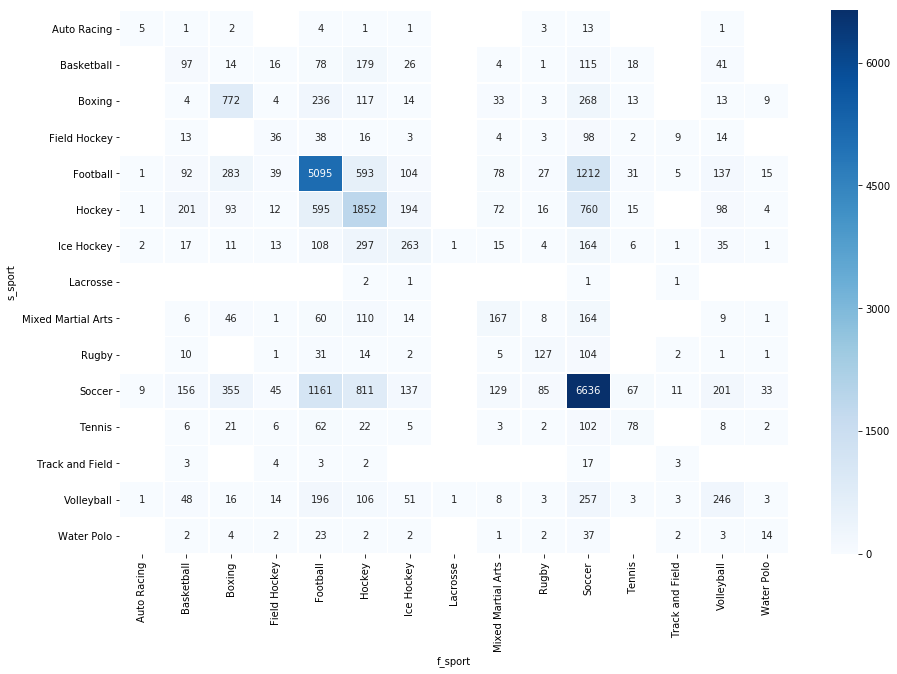

In [146]:
fig, ax = plt.subplots(figsize=(15,10)) 
ax = sns.heatmap(sports_10, annot=True, linewidths=.5, cmap='Blues', fmt='g')

## Correlation between product name and days to convert to paid

### Paid Group

In [89]:
df_p = """

    SELECT
        product_name,
        days_group,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm
        WHERE days_group is not null

        GROUP BY product_name, days_group
        
        ORDER BY sub_ct DESC; """

df_paid = (ps.sqldf(df_p, locals()))
df_paid.head(5)

,product_name,days_group,sub_ct
0,ESPN Plus Monthly Base,10.0,31053
1,Apple ESPN Plus Base Monthly with 7 Day Free T...,10.0,25992
2,Google ESPN Plus Base Monthly with 7 Day Free ...,10.0,8036
3,FireTV ESPN Plus Monthly Base with 7 Day Free ...,10.0,4560
4,Roku ESPN Plus Base with 7 day free trial,10.0,3635


In [90]:
title_paid = df_paid.pivot(index='days_group', columns='product_name', values='sub_ct')
title_paid.head()

product_name,Amazon ESPN Plus Monthly Base with 7 Day Free Trial,Apple ESPN Plus Base Monthly,Apple ESPN Plus Base Monthly with 7 Day Free Trial,Apple ESPN Plus Base Yearly,Apple ESPN Plus Base Yearly with 7 Day Free Trial,ESPN Plus Annual Base,ESPN Plus Annual MLB Upsell,ESPN Plus Monthly Base,ESPN Plus Monthly MLB Upsell,Fantasy Apple ESPN Plus Base Monthly,...,Google ESPN Plus Base Monthly,Google ESPN Plus Base Monthly with 30 Day Free Trial,Google ESPN Plus Base Monthly with 7 Day Free Trial,NHL.tv on ESPN+ / Yearly (2018-19),Roku ESPN Plus Base Monthly,Roku ESPN Plus Base with 7 day free trial,SONY - ESPN Plus Annual Base,SONY - ESPN Plus Monthly Base,XBOX - ESPN Plus Annual Base,XBOX - ESPN Plus Monthly Base
days_group,,,,,,,,,,,,,,,,,,,,,
0.0,5.0,54.0,619.0,NaN,4.0,16.0,NaN,404.0,1.0,NaN,...,NaN,1.0,291.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
10.0,62.0,2816.0,25992.0,32.0,216.0,1704.0,12.0,31053.0,48.0,41.0,...,35.0,7.0,8036.0,1.0,324.0,3635.0,5.0,72.0,2.0,12.0
20.0,3.0,379.0,2469.0,6.0,14.0,149.0,NaN,2858.0,NaN,3.0,...,6.0,1.0,742.0,NaN,48.0,390.0,NaN,1.0,NaN,NaN
30.0,1.0,190.0,1690.0,1.0,7.0,64.0,NaN,1737.0,NaN,NaN,...,5.0,NaN,453.0,NaN,18.0,278.0,NaN,2.0,NaN,NaN
40.0,1.0,68.0,777.0,NaN,5.0,46.0,NaN,683.0,NaN,3.0,...,1.0,NaN,174.0,NaN,5.0,121.0,NaN,1.0,NaN,NaN


In [94]:
ex7 = title_paid['Roku ESPN Plus Base with 7 day free trial']

like_ex7 = title_paid.corrwith(ex7)

corr_ex7 = pd.DataFrame(like_ex7, columns=['Correlation'])
corr_ex7.dropna(inplace=True)
corr_ex7.head()

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,Correlation
product_name,
Amazon ESPN Plus Monthly Base with 7 Day Free Trial,0.991483
Apple ESPN Plus Base Monthly,0.999312
Apple ESPN Plus Base Monthly with 7 Day Free Trial,0.999514
Apple ESPN Plus Base Yearly,0.993833
Apple ESPN Plus Base Yearly with 7 Day Free Trial,0.997876


In [95]:
corr_title_paid = pd.merge(corr_ex7, df_paid, left_on='product_name', right_on='product_name', how='inner')
corr_title_paid[corr_title_paid['sub_ct']>50].sort_values('Correlation', ascending=True).head(20)

,product_name,Correlation,days_group,sub_ct
0,Amazon ESPN Plus Monthly Base with 7 Day Free ...,0.991483,10.0,62
132,SONY - ESPN Plus Monthly Base,0.996054,10.0,72
33,Apple ESPN Plus Base Yearly with 7 Day Free Trial,0.997876,10.0,216
114,Roku ESPN Plus Base Monthly,0.998407,10.0,324
72,Fantasy Apple ESPN Plus Base Monthly with 7 Da...,0.998529,10.0,358
104,Google ESPN Plus Base Monthly with 7 Day Free ...,0.998844,20.0,742
105,Google ESPN Plus Base Monthly with 7 Day Free ...,0.998844,30.0,453
106,Google ESPN Plus Base Monthly with 7 Day Free ...,0.998844,0.0,291
107,Google ESPN Plus Base Monthly with 7 Day Free ...,0.998844,40.0,174
108,Google ESPN Plus Base Monthly with 7 Day Free ...,0.998844,50.0,107


[Text(0.5,0,'Amazon ESPN Plus Monthly Base with 7 Day Free Trial'),
 Text(1.5,0,'Apple ESPN Plus Base Monthly with 7 Day Free Trial'),
 Text(2.5,0,'Apple ESPN Plus Base Yearly with 7 Day Free Trial'),
 Text(3.5,0,'ESPN Plus Annual Base'),
 Text(4.5,0,'ESPN Plus Annual MLB Upsell'),
 Text(5.5,0,'ESPN Plus Monthly Base'),
 Text(6.5,0,'ESPN Plus Monthly MLB Upsell'),
 Text(7.5,0,'Fantasy Apple ESPN Plus Base Monthly with 7 Day Free Trial'),
 Text(8.5,0,'Fantasy Apple ESPN Plus Base Yearly with 7 Day Free Trial'),
 Text(9.5,0,'Fantasy Google ESPN Plus Base Monthly with 7 Day Free Trial'),
 Text(10.5,0,'FireTV ESPN Plus Monthly Base with 7 Day Free Trial'),
 Text(11.5,0,'Google ESPN Plus Base Monthly with 30 Day Free Trial'),
 Text(12.5,0,'Google ESPN Plus Base Monthly with 7 Day Free Trial'),
 Text(13.5,0,'Roku ESPN Plus Base with 7 day free trial'),
 Text(14.5,0,'SONY - ESPN Plus Annual Base'),
 Text(15.5,0,'SONY - ESPN Plus Monthly Base'),
 Text(16.5,0,'XBOX - ESPN Plus Annual Base'),
 T

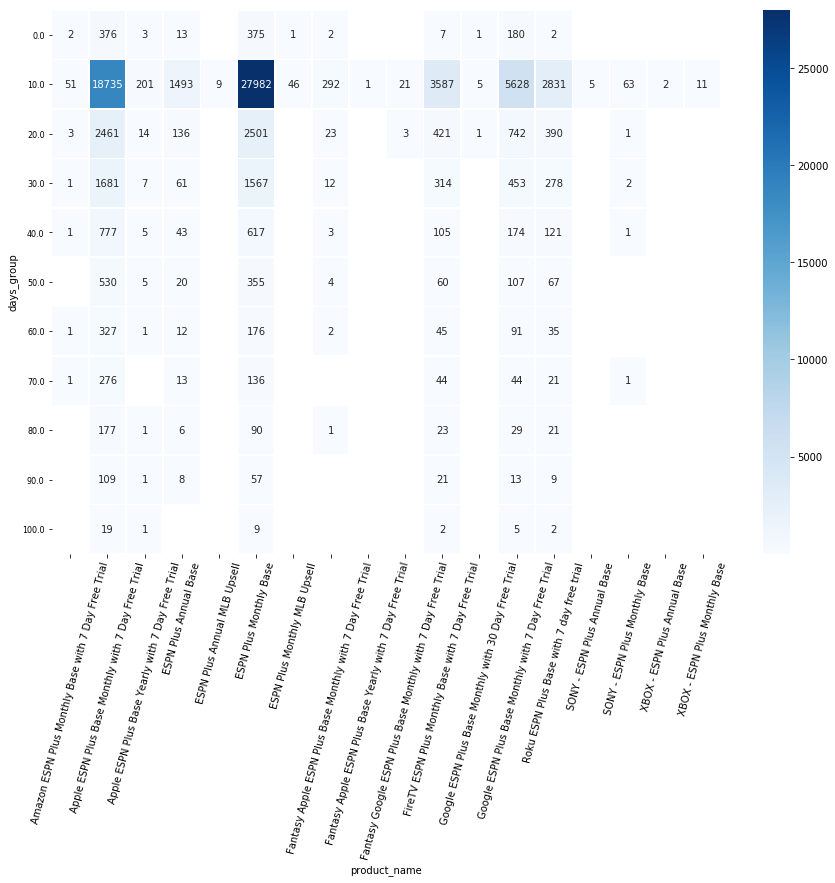

In [83]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(title_paid, annot=True, linewidths=.5, cmap='Blues', fmt='g')
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

# Appendix

## Finding Recommendater Model by First Stream Title and Days in between First and Second Streams

### Day 7 Conversion Group

In [5]:
df_7 = """

    SELECT
        title,
        days_group,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm
        WHERE conv_diff = 7
        AND days_group is not null
        
        GROUP BY title, days_group 
        
        ORDER BY sub_ct DESC; """

df7 = (ps.sqldf(df_7, locals()))
df7.head(5)

,title,days_group,sub_ct
0,Emporia State vs. #1 Kansas (M Basketball),10.0,1693
1,Empoli vs. Juventus (Serie A),10.0,346
2,Peyton Manning: Breaking Down Josh Rosen,10.0,337
3,Juventus vs. Genoa (Serie A),10.0,330
4,Udinese vs. Juventus (Serie A),10.0,304


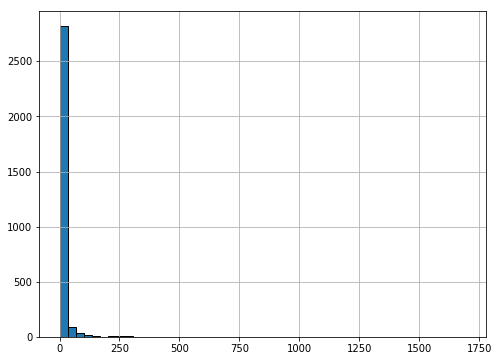

In [6]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
df7['sub_ct'].hist(bins=50)

In [7]:
days_sub_7 = df7.pivot(index='days_group', columns='title', values='sub_ct')
days_sub_7.head()

title,#1 Clarkson vs. St. Lawrence (W Hockey),#13 Wisconsin vs. Clarkson (M Hockey),#13 Wisconsin vs. St. Lawrence (M Hockey),#14 Michigan vs. Oakland (M Soccer),#18 Virginia Tech vs. Davidson (M Soccer),#21 Fordham vs. Saint Joseph's (M Soccer),#23 Baylor vs. Kansas (W Volleyball),#24 Cornell vs. Harvard (M Soccer),#24 Princeton vs. Cornell (W Soccer),#25 Cornell vs. Brown (M Soccer),...,Yale vs. Cornell (W Volleyball),Yale vs. Dartmouth (Field Hockey),Yale vs. Dartmouth (M Soccer),Yale vs. Dartmouth (W Soccer),Yale vs. Princeton (W Hockey),Yale vs. Quinnipiac (W Hockey),Youngstown State vs. Detroit Mercy (W Soccer),Youngstown State vs. Milwaukee (W Volleyball),Youngstown State vs. South Dakota State (Football),Zebre Rugby Club vs. Edinburgh (Guinness PRO14 Rugby)
days_group,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,19.0,53.0,10.0,14.0,29.0,10.0,9.0,6.0,5.0,3.0,...,6.0,8.0,7.0,2.0,7.0,3.0,1.0,4.0,58.0,11.0
20.0,NaN,4.0,1.0,NaN,3.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,2.0,NaN,2.0,1.0,NaN,NaN,7.0,NaN
30.0,NaN,3.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,18.0,NaN
40.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [8]:
ex1 = days_sub_7['Emporia State vs. #1 Kansas (M Basketball)']

like_ex1 = days_sub_7.corrwith(ex1)

corr_ex1 = pd.DataFrame(like_ex1, columns=['Correlation'])
corr_ex1.dropna(inplace=True)
corr_ex1.head()

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,Correlation
title,
#1 Clarkson vs. St. Lawrence (W Hockey),1.000000
#13 Wisconsin vs. Clarkson (M Hockey),0.994830
#13 Wisconsin vs. St. Lawrence (M Hockey),0.994956
#18 Virginia Tech vs. Davidson (M Soccer),0.988177
#21 Fordham vs. Saint Joseph's (M Soccer),1.000000


In [69]:
corr_7_day = pd.merge(corr_ex1, df7, left_on='title', right_on='title', how='inner')
corr_7_day[corr_7_day['sub_ct']>100].sort_values('Correlation', ascending=False).head(20)

,title,Correlation,days_group,sub_ct
634,Emporia State vs. #1 Kansas (M Basketball),1.000000,10.0,1693
635,Emporia State vs. #1 Kansas (M Basketball),1.000000,30.0,217
76,AS Roma vs. SPAL (Serie A),0.999622,10.0,101
2056,Top Rank Boxing on ESPN: Undercards,0.996795,10.0,289
687,Fiorentina vs. Cagliari (Serie A),0.996536,10.0,113
1377,New England Revolution vs. Orlando City SC,0.996360,10.0,112
627,Empoli vs. Juventus (Serie A),0.996356,10.0,346
695,Florida Panthers vs. Washington Capitals,0.995124,10.0,116
1616,Philadelphia Flyers vs. Boston Bruins,0.994838,10.0,128
2037,Toledo vs. Eastern Michigan (Football),0.994724,10.0,109


### Day 10 Conversion Group

In [10]:
df_10 = """

    SELECT
        title,
        days_group,
        count(subscription_source_ref) AS sub_ct
       
        FROM lm
        WHERE conv_diff = 10
        AND days_group is not null
        
        GROUP BY title, days_group 
        
        ORDER BY sub_ct DESC; """

df10 = (ps.sqldf(df_10, locals()))
df10.head(5)

,title,days_group,sub_ct
0,Emporia State vs. #1 Kansas (M Basketball),10.0,1774
1,Top Rank Boxing on ESPN: Undercards,10.0,849
2,Peyton Manning: Breaking Down Josh Rosen,10.0,700
3,Washington Capitals vs. Pittsburgh Penguins,10.0,542
4,Juventus vs. Genoa (Serie A),10.0,539


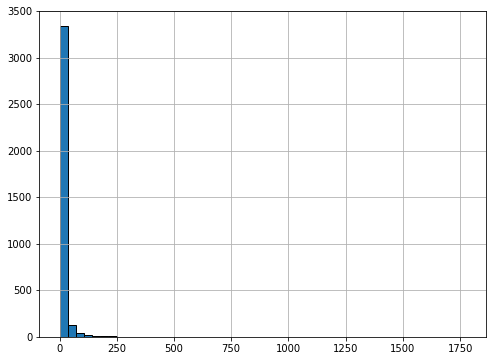

In [12]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
df10['sub_ct'].hist(bins=50)

In [13]:
days_sub_10 = df10.pivot(index='days_group', columns='title', values='sub_ct')
days_sub_10.head()

title,#1 Clarkson vs. St. Lawrence (W Hockey),#13 Wisconsin vs. Clarkson (M Hockey),#13 Wisconsin vs. St. Lawrence (M Hockey),#14 Michigan vs. Oakland (M Soccer),#18 Virginia Tech vs. Davidson (M Soccer),#21 Fordham vs. Saint Joseph's (M Soccer),#23 Baylor vs. Kansas (W Volleyball),#23 Rhode Island vs. Duquesne (M Soccer),#24 Cornell vs. Harvard (M Soccer),#24 Princeton vs. Cornell (W Soccer),...,Yale vs. Dartmouth (M Soccer),Yale vs. Dartmouth (W Soccer),Yale vs. Princeton (W Hockey),Yale vs. Quinnipiac (W Hockey),Youngstown State vs. Detroit Mercy (W Soccer),Youngstown State vs. Green Bay (W Soccer),Youngstown State vs. Green Bay (W Volleyball),Youngstown State vs. Milwaukee (W Volleyball),Youngstown State vs. South Dakota State (Football),Zebre Rugby Club vs. Edinburgh (Guinness PRO14 Rugby)
days_group,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,6.0,30.0,5.0,17.0,33.0,9.0,16.0,1.0,5.0,9.0,...,1.0,3.0,2.0,3.0,1.0,7.0,1.0,5.0,78.0,12.0
20.0,NaN,NaN,NaN,NaN,8.0,NaN,5.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0,NaN
30.0,NaN,1.0,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,39.0,NaN
40.0,NaN,1.0,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN


In [14]:
ex2 = days_sub_10['Emporia State vs. #1 Kansas (M Basketball)']

like_ex2 = days_sub_10.corrwith(ex2)

corr_ex2 = pd.DataFrame(like_ex2, columns=['Correlation'])
corr_ex2.dropna(inplace=True)
corr_ex2.head()

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,Correlation
title,
#13 Wisconsin vs. Clarkson (M Hockey),0.985174
#13 Wisconsin vs. St. Lawrence (M Hockey),1.000000
#14 Michigan vs. Oakland (M Soccer),1.000000
#18 Virginia Tech vs. Davidson (M Soccer),0.960173
#21 Fordham vs. Saint Joseph's (M Soccer),1.000000


In [71]:
corr_10_day = pd.merge(corr_ex2, df10, left_on='title', right_on='title', how='inner')
corr_10_day[corr_10_day['sub_ct']>100].sort_values('Correlation', ascending=False).head(20)

,title,Correlation,days_group,sub_ct
800,Emporia State vs. #1 Kansas (M Basketball),1.000000,50.0,107
798,Emporia State vs. #1 Kansas (M Basketball),1.000000,10.0,1774
799,Emporia State vs. #1 Kansas (M Basketball),1.000000,30.0,317
413,Cagliari vs. Bologna (Serie A),0.999610,10.0,117
1402,Louisiana Tech vs. UTSA (Football),0.996358,10.0,126
2029,Pittsburgh Penguins vs. Edmonton Oilers,0.995798,10.0,118
2037,Pittsburgh Penguins vs. Toronto Maple Leafs,0.994597,10.0,236
2742,UTEP vs. Louisiana Tech (Football),0.993956,10.0,101
2591,Top Rank Boxing on ESPN: Undercards,0.993219,30.0,146
2590,Top Rank Boxing on ESPN: Undercards,0.993219,10.0,849
